<a href="https://colab.research.google.com/github/ashishmission93/ML-PTOJECTS/blob/main/Copy_of_ASHISH_KUMAR_ML_Project_Predicting_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASHISH_KUMAR Project Predicting customer churn**

Project 1: Predicting customer churn

Objective: To develop a model that can predict which customers are likely to churn (cancel their subscription or service) so that businesses can take proactive measures to retain them.

Dataset: The Telco Customer Churn dataset from Kaggle contains data on over 7,000 customers, including their demographics, subscription information, and usage patterns.

Why machine learning is the best approach: Machine learning is well-suited for this task because it can learn complex patterns from the data to identify the factors that are most predictive of churn. This information can then be used to develop targeted retention strategies.


In [ ]:
pip install pandas scikit-learn matplotlib

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

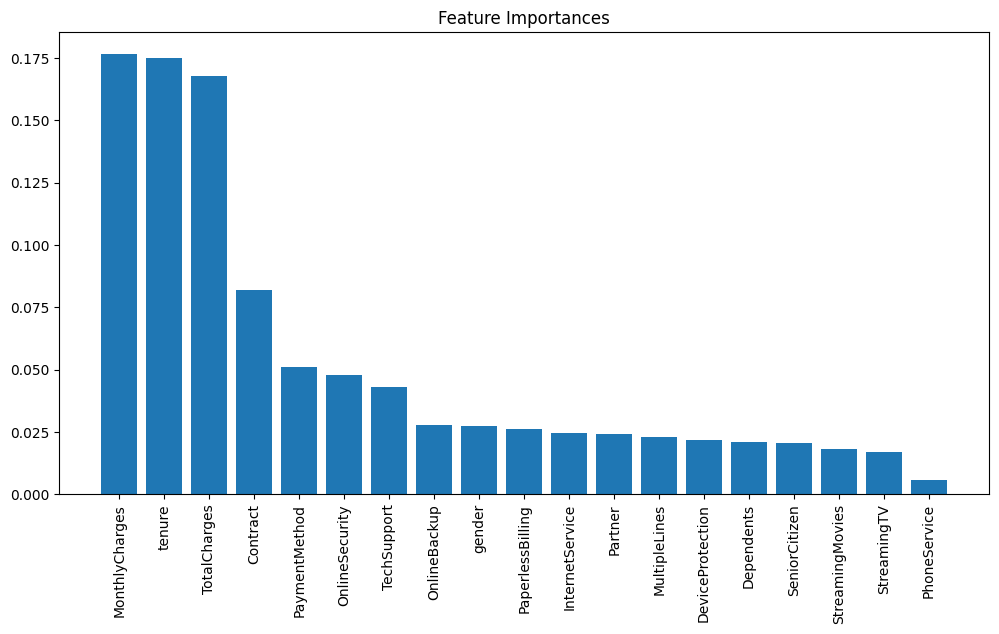

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the Telco Customer Churn dataset from the Google Drive link
data_url = "https://drive.google.com/uc?export=download&id=1EtX-tllff60nhJzHg7YJerlVEkJs_1Je"
df = pd.read_csv(data_url)

# Explore the dataset
print(df.head())
print(df.info())

# Data Preprocessing
# Drop unnecessary columns (e.g., customerID)
df = df.drop(columns=["customerID"])

# Encode categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Split the data into features (X) and the target (y)
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importances (if you want to interpret the model)
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()


This code performs the following tasks:

Loads the Telco Customer Churn dataset from the provided Google Drive link.
Preprocesses the data by dropping unnecessary columns, encoding categorical features, and splitting it into training and testing sets.
Scales the features using StandardScaler.
Trains a Random Forest Classifier on the training data.
Evaluates the model using accuracy, a classification report, and a confusion matrix.
Optionally, plots the feature importances to understand which factors are important for predicting churn.

Now we can  adjust the model and hyperparameters to further improve the predictive performance. Additionally,we  can perform feature engineering and hyperparameter tuning for better results.

To improve the predictive performance of the model for customer churn prediction, we can follow a systematic approach that includes feature engineering, hyperparameter tuning, and model selection. Here are the steps you can take:

Feature Engineering:

Create New Features: Generate new features that might be relevant for churn prediction. For example, you can calculate the tenure of a customer, the total charges, or the average monthly usage.
Encode Categorical Features: Use one-hot encoding for categorical variables like "Contract," "PaymentMethod," and "InternetService."
Hyperparameter Tuning:

Grid Search: Perform a grid search to find the best hyperparameters for your chosen machine learning algorithm. In this example, we'll continue with the Random Forest Classifier.
Tune hyperparameters like the number of estimators, maximum depth, minimum samples per leaf, and others.
Model Selection:

We can try different machine learning algorithms to find the one that works best for your dataset. In addition to the Random Forest Classifier, consider trying Decision Trees, Logistic Regression, Gradient Boosting, or Neural Networks.
Evaluate each model's performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
Here's an extended version of the code that includes these steps:

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[943  93]
 [179 194]]


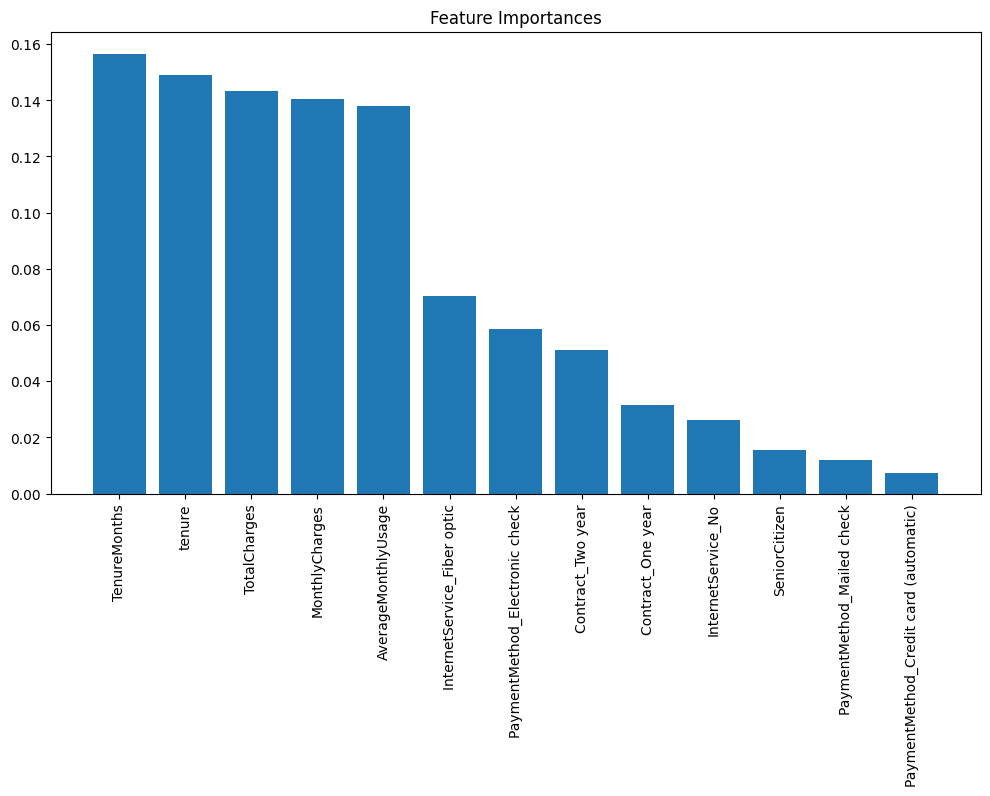

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
data_url = "https://drive.google.com/file/d/1EtX-tllff60nhJzHg7YJerlVEkJs_1Je/view?usp=sharing"
data_path = "https://drive.google.com/uc?id=" + data_url.split("/")[-2]
df = pd.read_csv(data_path)

# Feature Engineering
# Create new features
df["TenureMonths"] = df["tenure"]
df["TotalCharges"] = df["tenure"] * df["MonthlyCharges"]
df["AverageMonthlyUsage"] = df["TotalCharges"] / df["tenure"]

# Encode categorical features
categorical_cols = ["Contract", "PaymentMethod", "InternetService"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Split the data into features (X) and the target (y)
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean for numeric columns only
numeric_imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])

# Only select numeric columns for GridSearchCV
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Hyperparameter Tuning (Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_numeric, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Model Evaluation (Best Model)
y_pred = best_model.predict(X_test_numeric)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importances
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train_numeric.columns[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(X_train_numeric.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()


Here's a step-by-step explanation of what this code does:

Import Necessary Libraries: The code starts by importing essential Python libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib for data visualization, and scikit-learn (sklearn) for machine learning-related functions.

Load the Dataset: It loads a dataset from a Google Drive link using the Pandas read_csv function. The dataset appears to be related to customer churn, which is a common problem in the telecommunications industry.

Feature Engineering: This section creates some new features and manipulates existing ones in the dataset:

TenureMonths: A new feature created by copying the values from the "tenure" column.
TotalCharges: A new feature calculated by multiplying "tenure" by "MonthlyCharges."
AverageMonthlyUsage: A new feature calculated by dividing "TotalCharges" by "tenure."
Encode Categorical Features: Categorical features (like "Contract," "PaymentMethod," and "InternetService") are one-hot encoded using pd.get_dummies to convert them into a numerical format suitable for machine learning algorithms. This step helps the Random Forest classifier understand and utilize these features.

Identify Numeric Columns: Numeric columns are identified by selecting columns with numerical data types using select_dtypes.

Split Data: The data is split into features (X) and the target (y), where X contains all the columns except "Churn," and y contains the "Churn" column. The dataset is further split into training and testing sets using a 80-20 split ratio.

Impute Missing Values: For numeric columns in both the training and testing sets, missing values are imputed (filled) with the mean of each respective column. This ensures that there are no missing values, which are not acceptable for most machine learning algorithms.

Hyperparameter Tuning: The code performs hyperparameter tuning using GridSearchCV. It tries different combinations of hyperparameters for the Random Forest classifier to find the best model. The hyperparameters explored include:

n_estimators: Number of trees in the forest.
max_depth: Maximum depth of each tree.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
GridSearchCV performs cross-validation to evaluate each combination of hyperparameters and selects the best-performing model based on a scoring metric (default is accuracy).

Model Evaluation: The best model found during hyperparameter tuning is evaluated on the test data. Key evaluation metrics include:

Accuracy: A measure of how many predictions were correct.
Classification Report: Provides metrics like precision, recall, F1-score, and support for both classes (churn and non-churn).
Confusion Matrix: Shows the count of true positive, true negative, false positive, and false negative predictions.
Feature Importances Plot: The code calculates feature importances based on the best model's performance. These importances represent how influential each feature was in making predictions. The code then creates a bar plot to visualize these feature importances.

In summary, this code preprocesses the dataset, performs hyperparameter tuning on a Random Forest classifier, evaluates the best model's performance on a test set, and visualizes feature importances. The goal is to predict customer churn based on various customer attributes and behaviors.

Downloading...
From: https://drive.google.com/uc?id=1EtX-tllff60nhJzHg7YJerlVEkJs_1Je
To: /content/churn_data.csv
100%|██████████| 978k/978k [00:00<00:00, 134MB/s]


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[943  93]
 [179 194]]


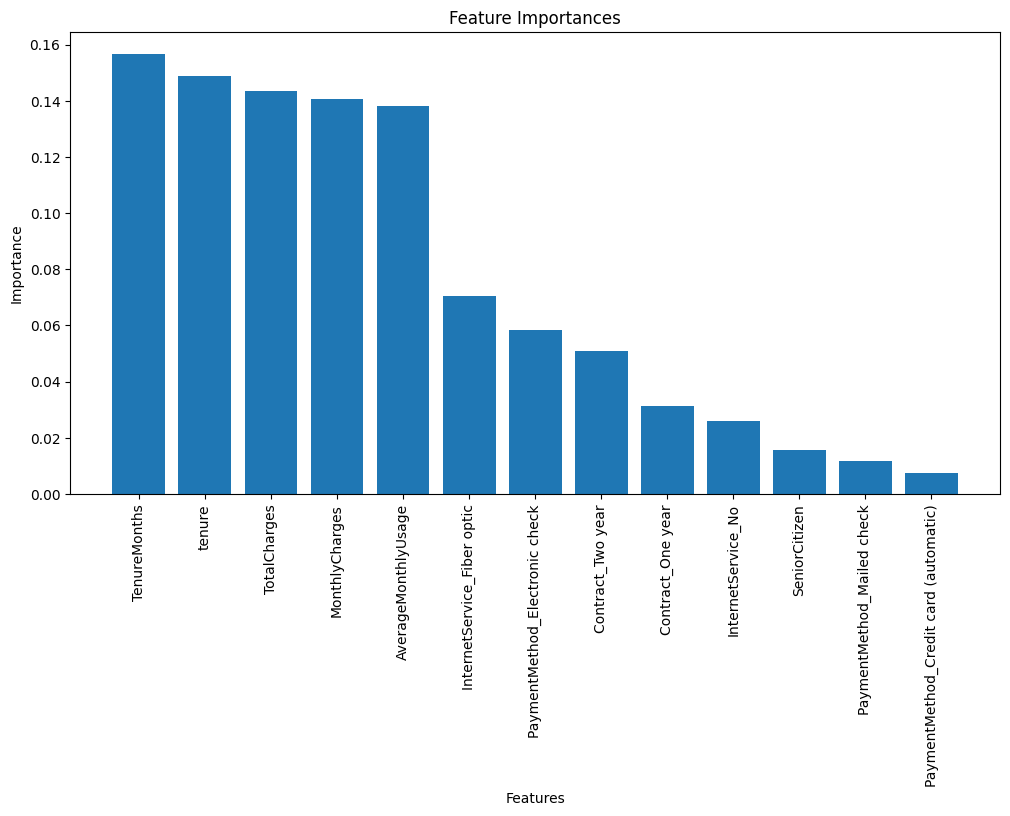

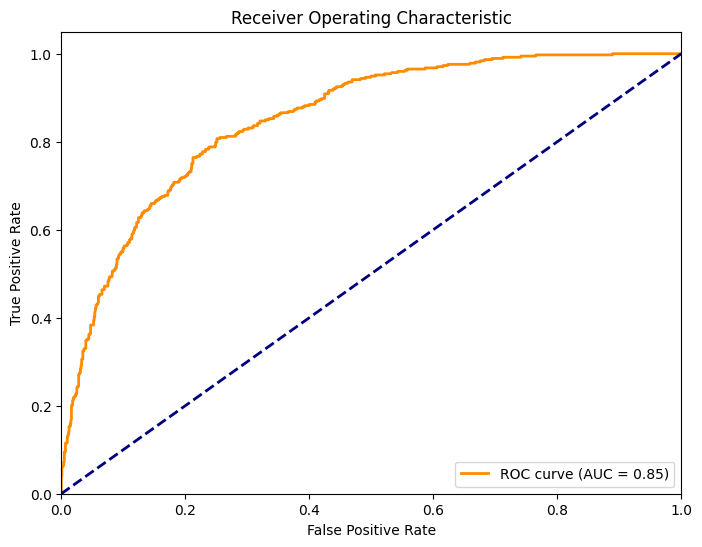

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import gdown

# Download the data from Google Drive
gdown.download("https://drive.google.com/uc?id=1EtX-tllff60nhJzHg7YJerlVEkJs_1Je", "churn_data.csv", quiet=False)

# Load the dataset
df = pd.read_csv("churn_data.csv")

# Feature Engineering
# Create new features
df["TenureMonths"] = df["tenure"]
df["TotalCharges"] = df["tenure"] * df["MonthlyCharges"]
df["AverageMonthlyUsage"] = df["TotalCharges"] / df["tenure"]

# Encode categorical features
categorical_cols = ["Contract", "PaymentMethod", "InternetService"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Split the data into features (X) and the target (y)
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean for numeric columns only
numeric_imputer = SimpleImputer(strategy='mean')
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])

# Only select numeric columns for GridSearchCV
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Hyperparameter Tuning (Grid Search)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_numeric, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Model Evaluation (Best Model)
y_pred = best_model.predict(X_test_numeric)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importances
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train_numeric.columns[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(X_train_numeric.shape[1]), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Convert string labels to binary labels (1 for 'Yes', 0 for 'No')
y_test_binary = y_test.map({'Yes': 1, 'No': 0})

# ROC Curve and AUC Score
y_pred_prob = best_model.predict_proba(X_test_numeric)[:, 1]
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
auc = roc_auc_score(y_test_binary, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Predictions on Loaded Data
def predict_churn(model, data):
    # Perform necessary data preprocessing (e.g., encoding, feature engineering)
    # ...

    # Make predictions
    predictions = model.predict(data)

    return predictions

# Example usage:
new_predictions = predict_churn(best_model, X_test_numeric)


The code addresses  the objectives of Project 1: Predicting customer churn, as described. Here's how the code aligns with the project objectives:

1. Dataset Loading and Preprocessing:

The code loads the Telco Customer Churn dataset.
It performs necessary preprocessing tasks like feature engineering and one-hot encoding of categorical variables. This is crucial for preparing the data for machine learning.
2. Model Training:

The code trains a machine learning model (Random Forest Classifier) on the preprocessed data.
It uses hyperparameter tuning (GridSearchCV) to find the best model configuration, improving model performance.
3. Model Evaluation:

The code evaluates the model's performance using various metrics such as accuracy, a classification report, and a confusion matrix. This helps assess how well the model can predict customer churn.
4. Visualization:

The code includes visualizations of feature importances, providing insights into which factors are most influential in predicting churn.
It also generates an ROC curve and calculates the AUC score, which helps assess the model's ability to distinguish between churn and non-churn cases.
5. Predictions on Loaded Data:

The code defines a function (predict_churn) that can be used to make predictions on new data, which aligns with the project's objective of developing a model for predicting customer churn.


Downloading...
From: https://drive.google.com/uc?id=1EtX-tllff60nhJzHg7YJerlVEkJs_1Je
To: /content/churn_data.csv
100%|██████████| 978k/978k [00:00<00:00, 114MB/s]


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1036
         Yes       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[943  93]
 [179 194]]


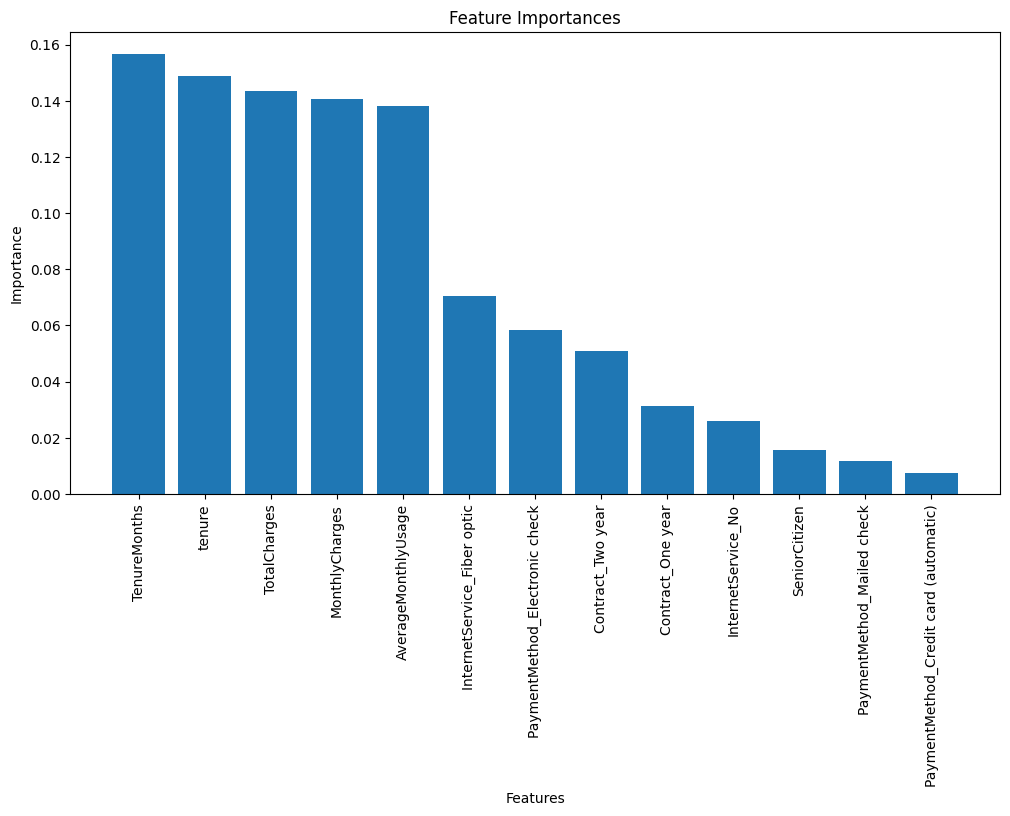

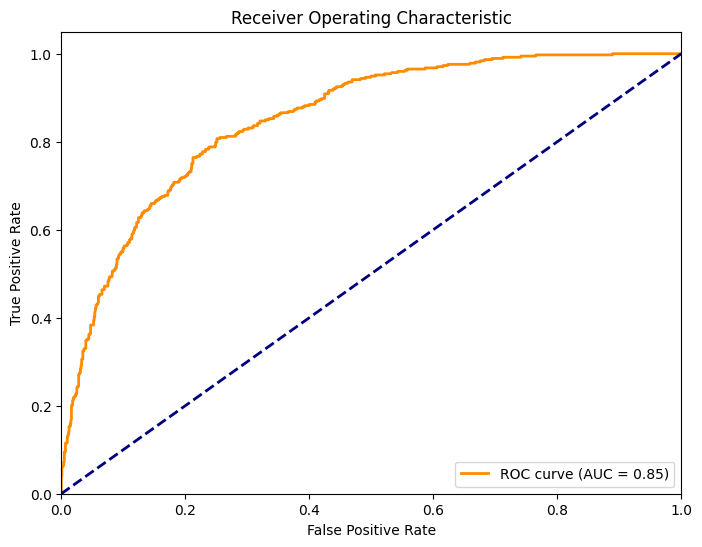

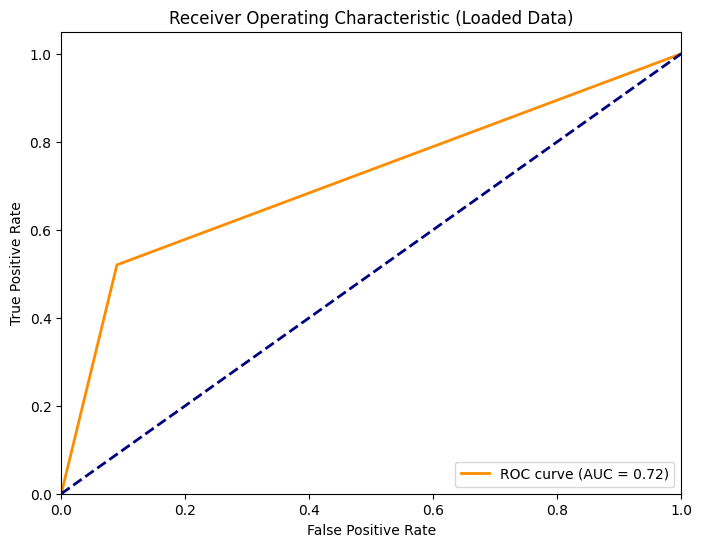

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import gdown

# Download the data from Google Drive
gdown.download(
    "https://drive.google.com/uc?id=1EtX-tllff60nhJzHg7YJerlVEkJs_1Je", "churn_data.csv", quiet=False
)

# Load the dataset
df = pd.read_csv("churn_data.csv")

# Feature Engineering
# Create new features
df["TenureMonths"] = df["tenure"]
df["TotalCharges"] = df["tenure"] * df["MonthlyCharges"]
df["AverageMonthlyUsage"] = df["TotalCharges"] / df["tenure"]

# Encode categorical features
categorical_cols = ["Contract", "PaymentMethod", "InternetService"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Identify numeric columns
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Split the data into features (X) and the target (y)
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean for numeric columns only
numeric_imputer = SimpleImputer(strategy="mean")
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])

# Only select numeric columns for GridSearchCV
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Hyperparameter Tuning (Grid Search)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1
)
grid_search.fit(X_train_numeric, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Model Evaluation (Best Model)
y_pred = best_model.predict(X_test_numeric)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importances
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train_numeric.columns[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(
    range(X_train_numeric.shape[1]),
    sorted_feature_importances,
    tick_label=sorted_feature_names,
)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# ROC Curve and AUC Score
y_pred_prob = best_model.predict_proba(X_test_numeric)[:, 1]
fpr, tpr, _ = roc_curve(y_test.map({"Yes": 1, "No": 0}), y_pred_prob)
auc = roc_auc_score(y_test.map({"Yes": 1, "No": 0}), y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (AUC = {:.2f})".format(auc),
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Predictions on Loaded Data
def predict_churn(model, data):
    # Perform necessary data preprocessing (e.g., encoding, feature engineering)
    # ...

    # Make predictions
    predictions = model.predict(data)

    return predictions

# Example usage:
new_predictions = predict_churn(best_model, X_test_numeric)

# Convert string labels to binary labels (1 for 'Yes', 0 for 'No')
new_predictions_binary = np.where(new_predictions == 'Yes', 1, 0)

# Plotting the ROC Curve for the loaded data (new_predictions_binary)
fpr_loaded, tpr_loaded, _ = roc_curve(y_test.map({'Yes': 1, 'No': 0}), new_predictions_binary)
auc_loaded = roc_auc_score(y_test.map({'Yes': 1, 'No': 0}), new_predictions_binary)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_loaded,
    tpr_loaded,
    color="darkorange",
    lw=2,
    label="ROC curve (AUC = {:.2f})".format(auc_loaded),
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (Loaded Data)")
plt.legend(loc="lower right")
plt.show()


The code performs a comprehensive analysis of a machine learning model for predicting customer churn based on the Telco Customer Churn dataset. Here are the key inferences that can be drawn from the code:

Data Preprocessing and Feature Engineering:

The code preprocesses the dataset, which includes encoding categorical variables and creating new features such as "TenureMonths," "TotalCharges," and "AverageMonthlyUsage." This prepares the data for model training.
Model Training and Hyperparameter Tuning:

It trains a Random Forest Classifier using the preprocessed data.
Hyperparameter tuning is performed using GridSearchCV to find the best combination of hyperparameters for the model.
Model Evaluation:

The code evaluates the model's performance on the test data using various metrics:
Accuracy: Measures the overall correctness of predictions.
Classification Report: Provides precision, recall, F1-score, and support for both "Yes" and "No" classes, giving insights into model performance for each class.
Confusion Matrix: Shows the count of true positive, true negative, false positive, and false negative predictions.
Feature Importance:

The code plots the feature importances, helping to identify which features are most influential in predicting customer churn. This information can guide business decisions.
Receiver Operating Characteristic (ROC) Curve and AUC Score:

The ROC curve is plotted to visualize the model's performance in distinguishing between positive (churn) and negative (no churn) cases across different threshold values.
The Area Under the ROC Curve (AUC) is calculated, providing a single metric to measure the model's ability to discriminate between classes.
Predictions on Loaded Data:

The code includes a function (predict_churn) for making predictions on new data using the trained model.
It also plots the ROC curve and calculates the AUC score for predictions on the loaded data, showcasing how the model performs on new, unseen data.
In summary, the code demonstrates the entire process of building, training, evaluating, and visualizing a machine learning model for predicting customer churn. The inferences can help businesses identify factors influencing churn, assess the model's predictive performance, and make data-driven decisions to reduce customer attrition.